#  Exploratory Data Analysis

In [1]:
%matplotlib inline

# Ignore deprecated warning
import warnings
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set font scale and style
plt.rcParams.update({'font.size': 15})

In [2]:
#  Load cleaned data
df = pd.read_csv('../data/clean_data.csv')
df.columns = [x.lower() for x in df.columns] # column names in lower case
print('Data size',df.shape)

Data size (3817613, 23)


# Descriptive statistics

In [85]:
df.drop('fatal', axis =1).describe()

,c_year,c_hour,c_vehs,v_id,v_year,p_id,p_age,c_case
count,3.817613e+06,3.817613e+06,3.817613e+06,3.817613e+06,3.817613e+06,3.817613e+06,3.817613e+06,3.817613e+06
mean,2.007373e+03,1.371886e+01,2.099251e+00,1.548594e+00,1.999937e+03,1.512814e+00,3.664816e+01,1.275838e+06
std,5.455213e+00,5.106257e+00,1.102796e+00,8.167865e-01,7.572315e+00,1.230836e+00,1.868770e+01,7.419594e+05
min,1.999000e+03,0.000000e+00,1.000000e+00,1.000000e+00,1.901000e+03,1.000000e+00,1.000000e+00,1.524000e+03
25%,2.003000e+03,1.000000e+01,2.000000e+00,1.000000e+00,1.995000e+03,1.000000e+00,2.200000e+01,6.370150e+05
50%,2.007000e+03,1.400000e+01,2.000000e+00,1.000000e+00,2.000000e+03,1.000000e+00,3.500000e+01,1.272317e+06
75%,2.012000e+03,1.700000e+01,2.000000e+00,2.000000e+00,2.005000e+03,2.000000e+00,5.000000e+01,1.914410e+06
max,2.017000e+03,2.300000e+01,7.700000e+01,7.700000e+01,2.018000e+03,9.300000e+01,9.900000e+01,2.570235e+06


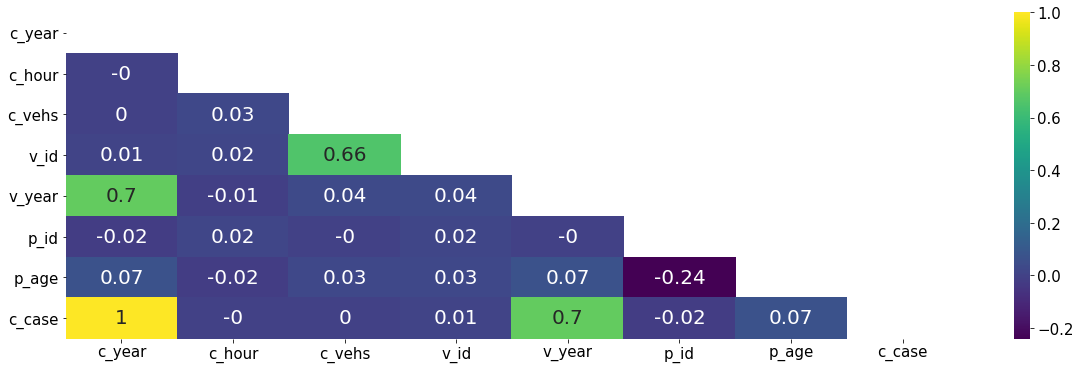

In [89]:
fig, ax = plt.subplots(figsize=(20,6))

# Correlation matrix
corr_matrix = df.drop('fatal', axis =1).corr()

# Plot
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(round(corr_matrix, 2), annot=True, annot_kws={"size": 20},mask = mask, 
            cmap = plt.get_cmap("viridis"),ax = ax)
plt.show()

# Histogram

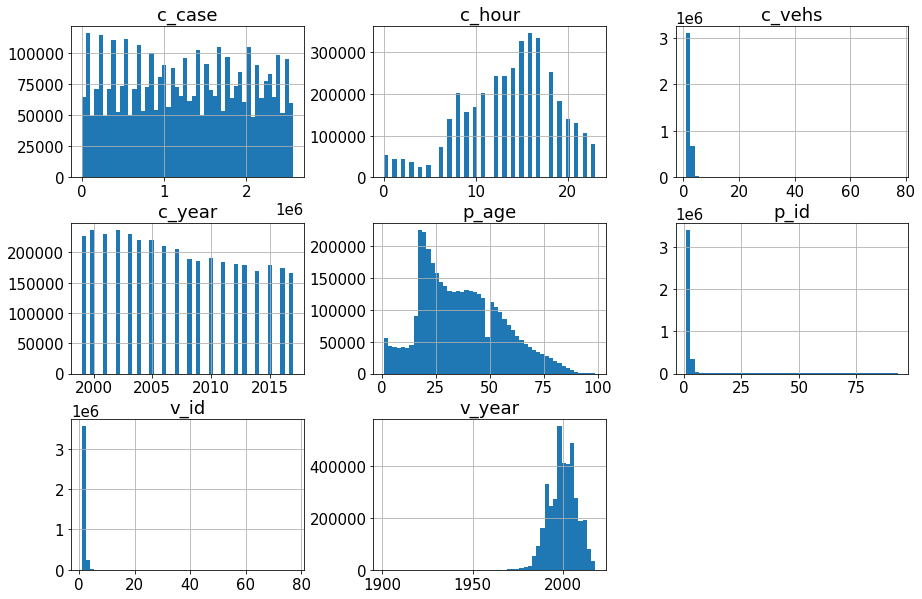

In [4]:
df.drop('fatal', axis =1).hist(bins = 50, figsize = (15,10))
plt.show()

# Fatality rate by collision hour

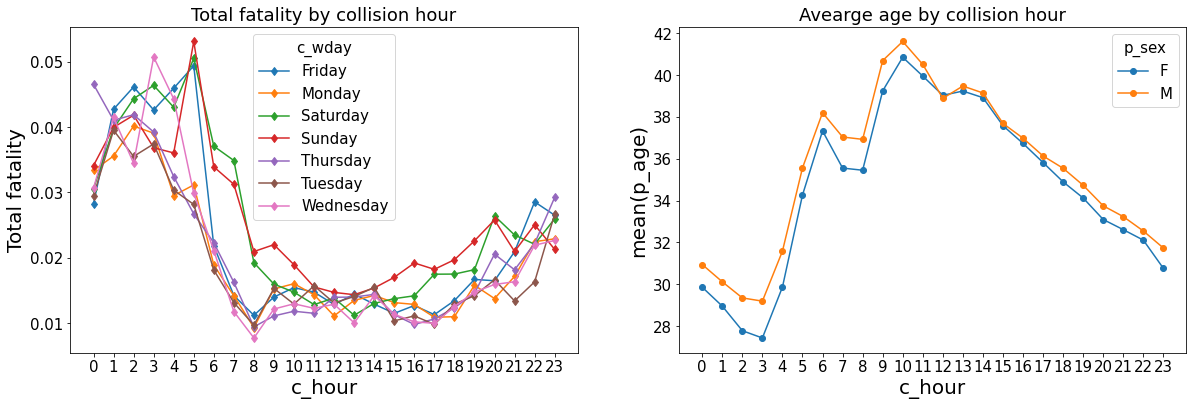

In [84]:
# set figure
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (20,6))

# pivot table
pivot_tab_hr1 = df.pivot_table('fatal', index = 'c_hour', columns = 'c_wday', aggfunc = 'sum')
pivot_tab_hr = df.pivot_table('p_age', index = 'c_hour', columns = 'p_sex', aggfunc = 'mean')
pivot_tab_hr2 = df.pivot_table('fatal', index = 'c_hour', columns = 'c_wday', aggfunc = 'mean')

# plots
pivot_tab_hr.plot(marker = 'o', ax = ax2)
pivot_tab_hr2.plot(marker = 'd', ax = ax1)

ax1.set_xlabel('c_hour', fontsize = 20)
ax1.set_ylabel('Total fatality', fontsize = 20)
ax1.set_title('Total fatality by collision hour')
ax1.set_xticks(range(24))
ax2.set_xlabel('c_hour', fontsize = 20)
ax2.set_ylabel('mean(p_age)', fontsize = 20)
ax2.set_title('Avearge age by collision hour')
ax2.set_xticks(range(24))
plt.savefig('../image/fig_h.png')

#   Fatality rate by gender
- Almost 1 in 100 females are involved in fatal accidents, whereas 2 in 100 males are involved in fatal accidents

- The fatality rate is high for males than females.

- The age vs. sex plot suggests more investigation (see below).

In [5]:
pd.crosstab(df['fatal'], df['p_sex'], margins = True, margins_name = 'Total')

p_sex,F,M,Total
fatal,,,
0,1744035,2012269,3756304
1,20795,40514,61309
Total,1764830,2052783,3817613


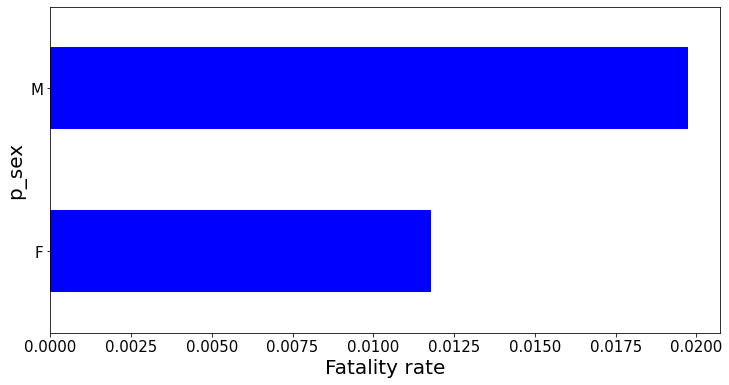

In [7]:
df.groupby('p_sex')['fatal'].mean().plot(kind = 'barh', figsize=(12,6), color = 'b')
plt.ylabel('p_sex', fontsize=20)
plt.xlabel('Fatality rate', fontsize=20) 
plt.savefig('../image/fig2.pdf')

#  Age group are involved in fatal collision

- Teenagers at 18 years old (mostly males) involve in most fatal collisions
- The total number of fatal accidents fluctuates slightly between age 22 to 80
- Majority of people (males and females) involved in any sort of collision are  within 19 and 20 years old.

In [8]:
df.pivot_table('p_age', index = 'p_sex', columns = 'fatal', aggfunc = 'mean')

fatal,0,1
p_sex,,
F,36.490061,39.067853
M,36.727187,38.287308


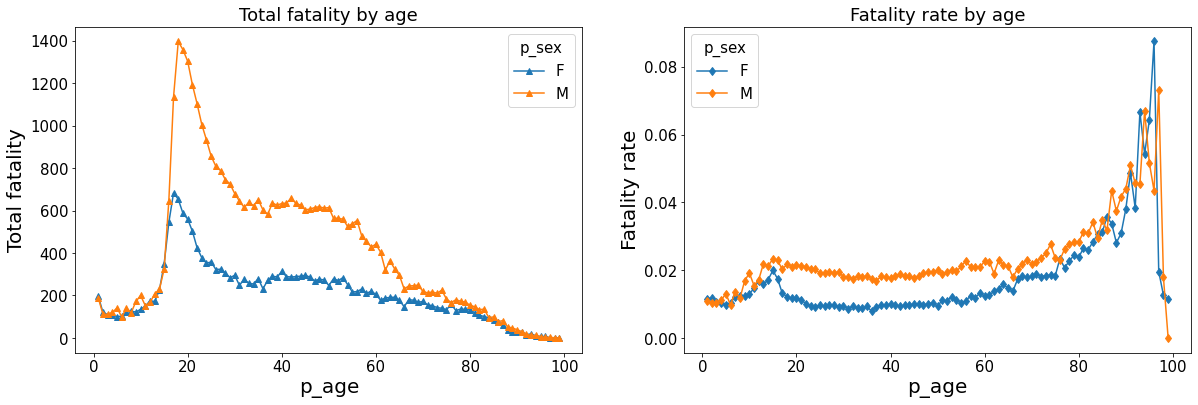

In [49]:
# set figure
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (20,6))

# pivot table
pivot_tab_age1 =df.pivot_table('fatal', index = 'p_age', columns = 'p_sex', aggfunc = 'sum')
pivot_tab_age2 = df.pivot_table('fatal', index = 'p_age', columns = 'p_sex', aggfunc = 'mean')

# plots
pivot_tab_age1.plot(marker = '^', ax = ax1)
pivot_tab_age2.plot(marker = 'd', ax = ax2)

ax1.set_xlabel('p_age', fontsize = 20)
ax1.set_ylabel('Total fatality', fontsize = 20)
ax1.set_title('Total fatality by age')
ax2.set_xlabel('p_age', fontsize = 20)
ax2.set_ylabel('Fatality rate', fontsize = 20)
ax2.set_title('Fatality rate by age')
plt.savefig('../image/fig3.png')

In [12]:
age = pd.cut(df['p_age'],[0,18,50,100])
df.pivot_table('fatal', index = ['p_sex',age], aggfunc = 'sum')

fatal
p_sex p_age           
F     (0, 18]     4193
      (18, 50]   10206
      (50, 100]   6396
M     (0, 18]     5663
      (18, 50]   23964
      (50, 100]  10887

# Age distribution among fatal collision

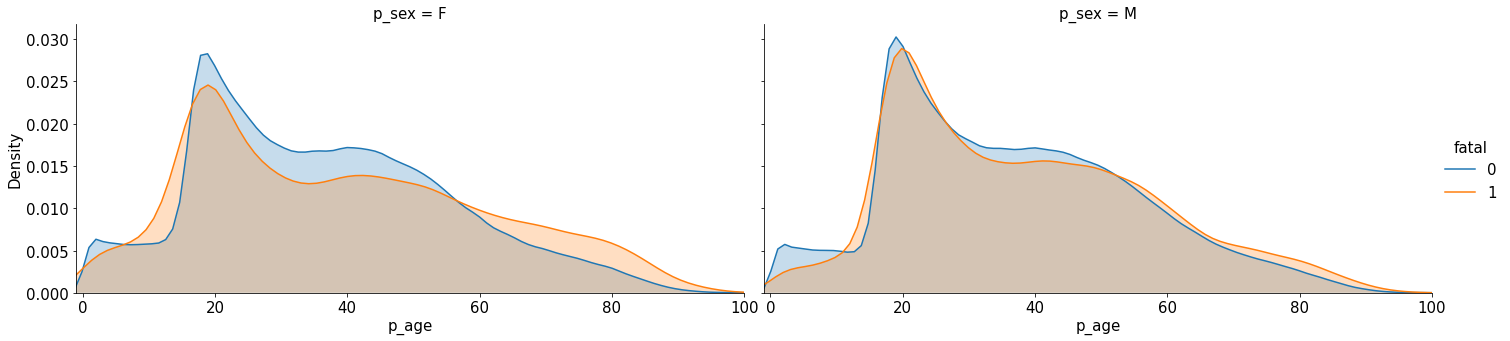

In [22]:
g = sns.FacetGrid(data = df.dropna(), hue = 'fatal',col = 'p_sex',aspect=2, height = 5)
(g.map(sns.kdeplot, 'p_age', shade = True).set_axis_labels("p_age","Density").add_legend())
plt.xlim([-1,100])

plt.savefig('../image/fig4.pdf')

#  Vehicle model year was involved in most fatal collisions
-  The 2000 & 2001 vehicle models caused the most fatal collisions and they were driven mostly by mostly males.

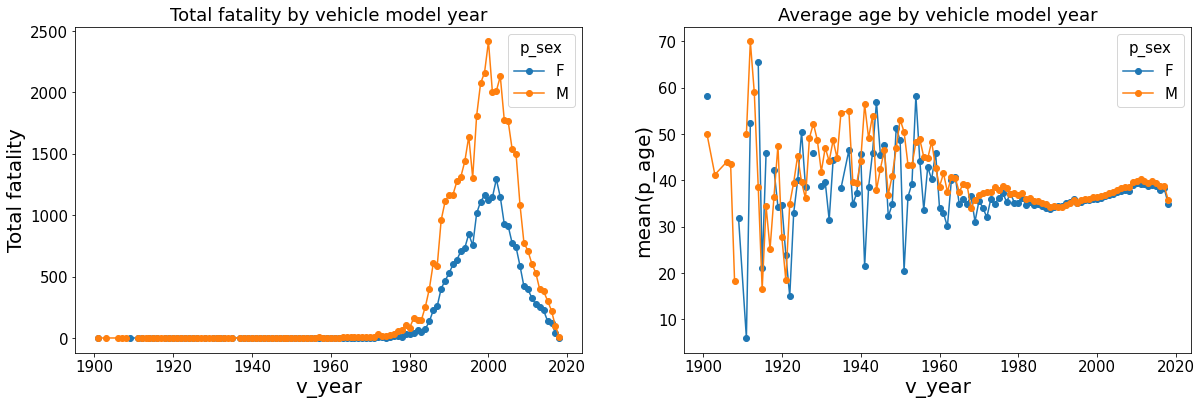

In [76]:
# set figure
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (20,6))

# pivot table
pivot_tab_vyr = df.pivot_table('fatal', index = 'v_year', columns = 'p_sex', aggfunc = 'sum')
pivot_tab_vyr_ = df.pivot_table('p_age', index = 'v_year', columns = 'p_sex', aggfunc = 'mean')


# plots
pivot_tab_vyr.plot(marker = 'o', ax = ax1)
pivot_tab_vyr_.plot(marker = 'o', ax = ax2)

ax1.set_xlabel('v_year', fontsize = 20)
ax1.set_ylabel('Total fatality', fontsize = 20)
ax1.set_title('Total fatality by vehicle model year')
ax2.set_xlabel('v_year', fontsize = 20)
ax2.set_ylabel('mean(p_age)', fontsize = 20)
ax2.set_title('Average age by vehicle model year')
plt.savefig('../image/fig5.png')

# Collision distribution of vehicle model year by gender
- The new vehicle models from 2005 to present seem to be involved in mostly non-fatal collisions.

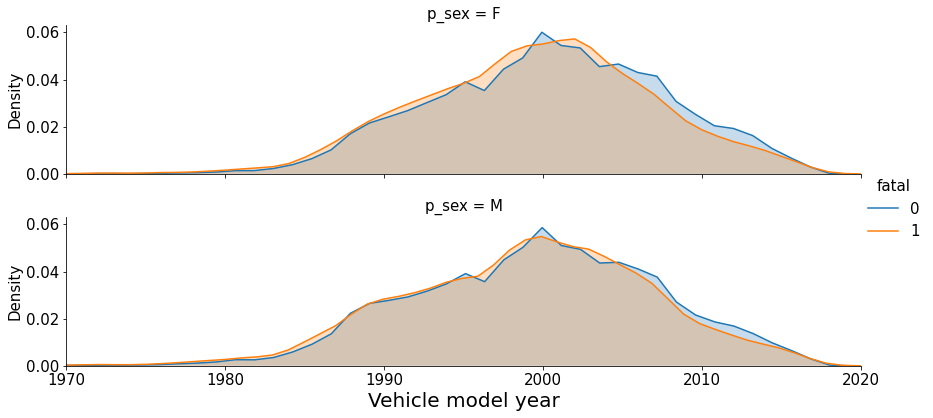

In [25]:
g = sns.FacetGrid(data = df.dropna(), hue = 'fatal',row = 'p_sex', aspect =4)  
(g.map(sns.kdeplot, 'v_year', shade = True).set_axis_labels("Vehicle model year","Density").add_legend())

plt.xlim([1970,2020])
plt.xlabel("Vehicle model year", fontsize = 20)
#plt.legend(title = 'Fatality', fontsize = 20)
plt.savefig('../image/fig7.pdf')

#  Fatality rate of males and  females each year

- Most vehicle collisions occur  in the year 2006, 2005, and 1999 respectively.

- More males got involved in a vehicle collision than females

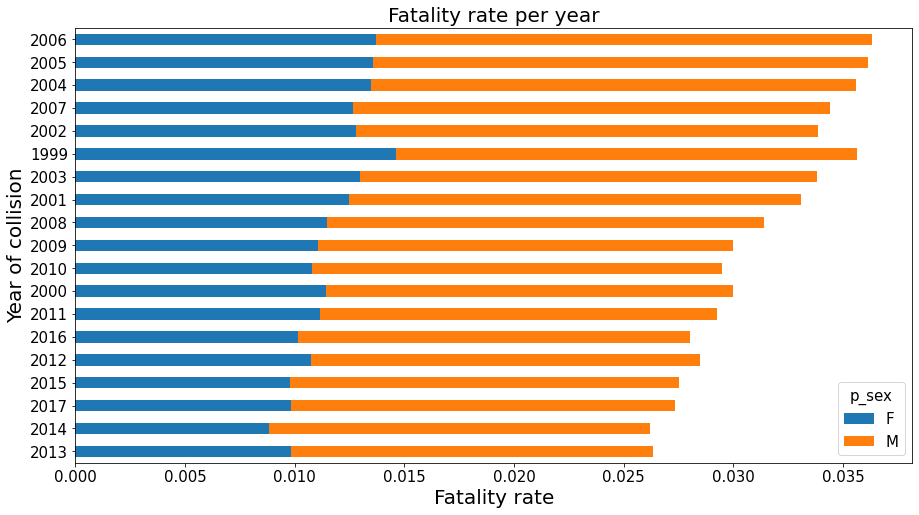

In [26]:
#  Plot figure
table_year = df.pivot_table('fatal', index = 'c_year', columns = 'p_sex', aggfunc = 'mean')
table_year.sort_values(by =['M']).plot(kind = 'barh', stacked = True,figsize = (15,8))

plt.xlabel('Fatality rate', fontsize = 20)
plt.ylabel('Year of collision', fontsize = 20)
plt.title('Fatality rate per year', fontsize = 20)
plt.savefig('../image/fig1.png')

# Vechicle types with the most fatal collisions
- Most fatal accident are caused by road tractor

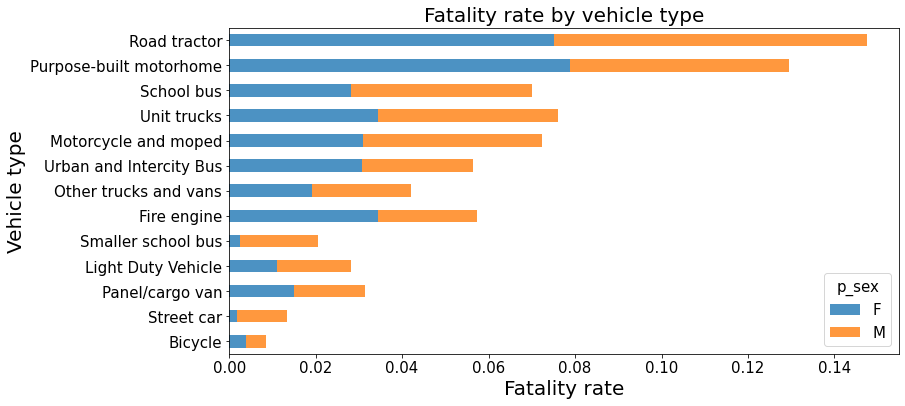

In [27]:
# Plot figure
table_vtype = df.pivot_table('fatal', index = 'v_type', columns = 'p_sex', aggfunc = 'mean')
table_vtype.sort_values(by =['M']).plot(kind = 'barh', stacked = True,figsize = (12,6), alpha =0.8)

plt.ylabel('Vehicle type', fontsize=20)
plt.xlabel('Fatality rate', fontsize=20)
plt.legend(loc= 'lower right', title = 'p_sex')
plt.title('Fatality rate by vehicle type', fontsize=20)
plt.savefig('../image/fig6.pdf')

# Fatality rate per day
- Most fatal accidents occur on weekends

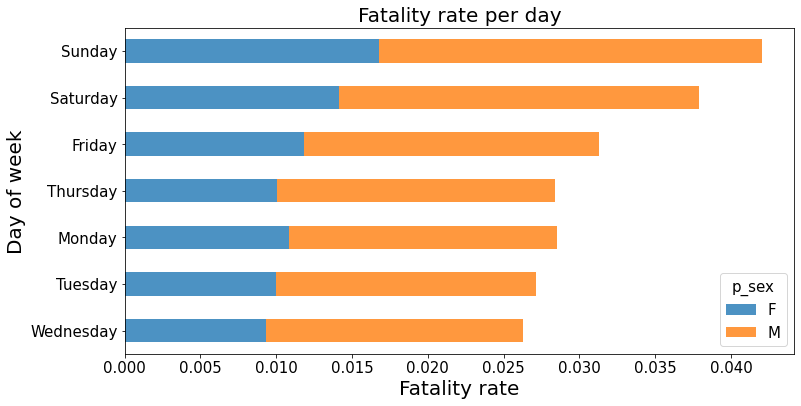

In [28]:
# Plot figure
#order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday']
#.loc[order]
table_day = df.pivot_table('fatal', index = 'c_wday', columns = 'p_sex', aggfunc = 'mean')
table_day.sort_values(by =['M']).plot(kind = 'barh', stacked = True,figsize = (12,6), alpha =0.8)

plt.xlabel('Fatality rate',fontsize =20)
plt.ylabel('Day of week',fontsize =20)
plt.legend(title = 'p_sex')
plt.title('Fatality rate per day',fontsize =20)
plt.savefig('../image/fig8.pdf')

#  Fatality rate per month
- Most fatal accidents occur in July and August, that is during the summer weather

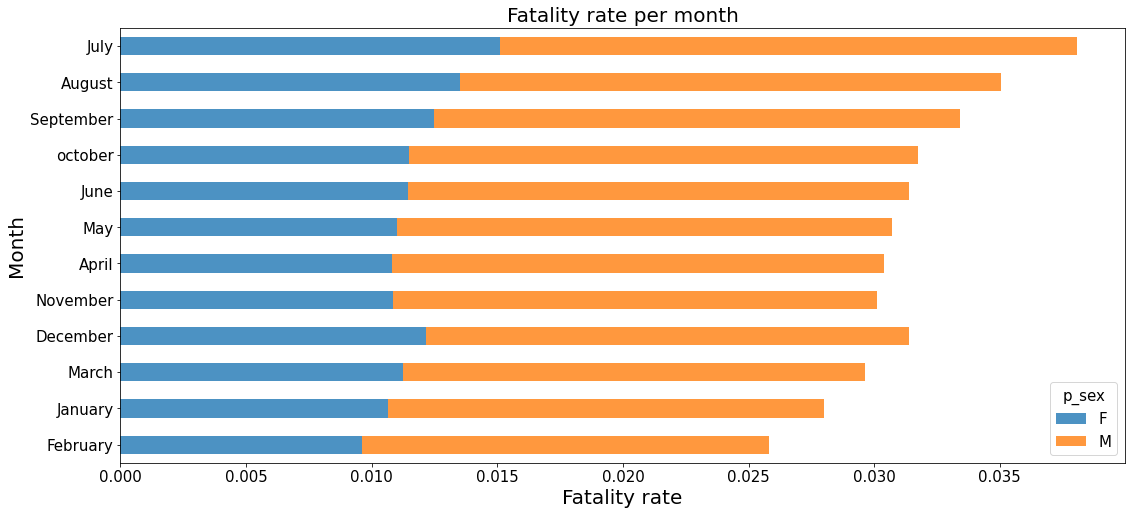

In [29]:
# order =['January','February','March', 'April','May', 'June',  
#     'July','August','September', 'october','November','December']
#.loc[order]        
# Plot figure
table_month = df.pivot_table('fatal', index = 'c_mnth', columns = 'p_sex', aggfunc = 'mean')
table_month.sort_values(by =['M']).plot(kind = 'barh', 
                                                   stacked = True, figsize = (18,8), alpha =0.8)
plt.ylabel('Month', fontsize =20)
plt.xlabel('Fatality rate', fontsize =20)
plt.legend(title = 'p_sex')
plt.title('Fatality rate per month', fontsize =20)
plt.savefig('../image/fig9.png')

#  10. Fatality rate by weather condition
- The fatal collisions occur mostly due to visibility limitation

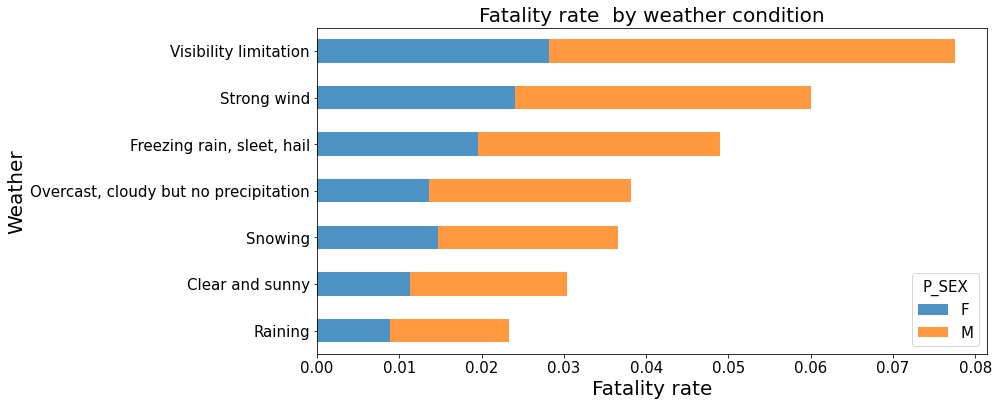

In [18]:
# Plot figure
table_weather = df.pivot_table('FATAL', index = 'C_WTHR', columns = 'P_SEX', aggfunc = 'mean')
table_weather.sort_values(by =['M']).plot(kind = 'barh', stacked = True,figsize = (12,6), alpha =0.8)

plt.ylabel('Weather', fontsize=20)
plt.xlabel('Fatality rate', fontsize=20)
plt.legend(title = 'P_SEX')
plt.title('Fatality rate  by weather condition', fontsize=20)
plt.savefig('../image/fig10.pdf')

#  Fatality rate by road configuration
- Most fatal accidents occur at passing or climbing lane

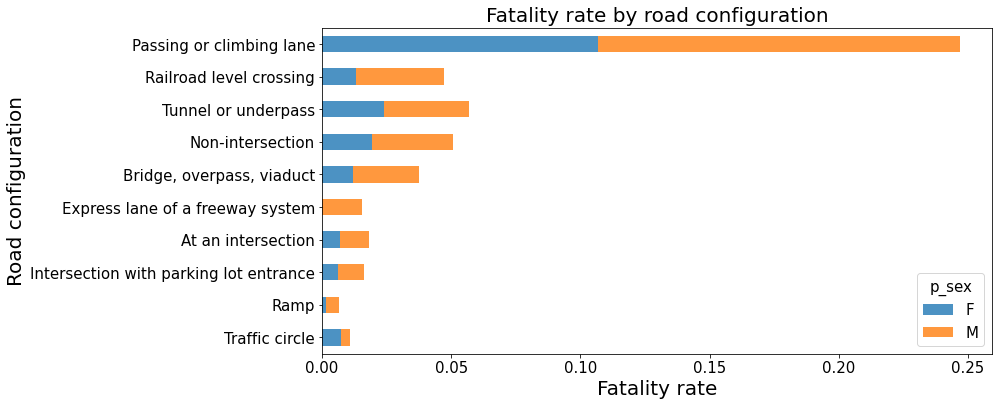

In [30]:
# Plot figure
table_road = df.pivot_table('fatal', index = 'c_rcfg', columns = 'p_sex', aggfunc = 'mean')
table_road.sort_values(by =['M']).plot(kind = 'barh', 
                                                    stacked = True,figsize = (12,6), alpha =0.8)
plt.ylabel('Road configuration', fontsize=20)
plt.xlabel('Fatality rate', fontsize=20)
plt.legend(title = 'p_sex')
plt.title('Fatality rate by road configuration', fontsize=20)
plt.savefig('../image/fig11.pdf')

#  Fatality rate by Road alignment
- Most fatal accidents occur by curved and gradient road alignment

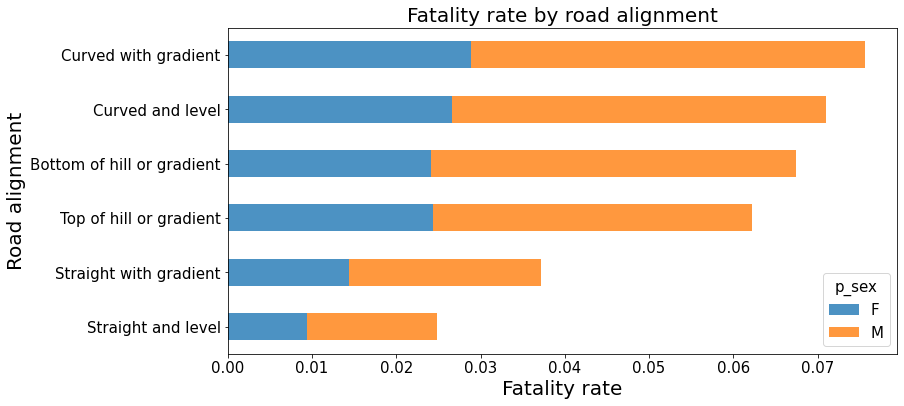

In [31]:
# Plot figure
table_road = df.pivot_table('fatal', index = 'c_raln', columns = 'p_sex', aggfunc = 'mean')
table_road.sort_values(by =['M']).plot(kind = 'barh', 
                                                    stacked = True,figsize = (12,6), alpha =0.8)
plt.ylabel('Road alignment', fontsize=20)
plt.xlabel('Fatality rate', fontsize=20)
plt.legend(title = 'p_sex')
plt.title('Fatality rate by road alignment', fontsize=20)
plt.savefig('../image/fig13.pdf')